# **4.1 Conhecendo os dados**

In [21]:
import pandas as pd
notas = pd.read_csv('ratings.csv')
notas.head()
notas.columns=['usuarioId','filmeId','nota','momento']
notas['nota']
notas['nota'].unique()
notas['nota'].value_counts()
notas['nota'].mean()

3.501556983616962

# **4.2 Visualizando dados com histograma e boxplot**

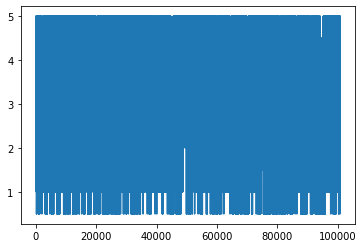

In [22]:
notas.nota.plot()

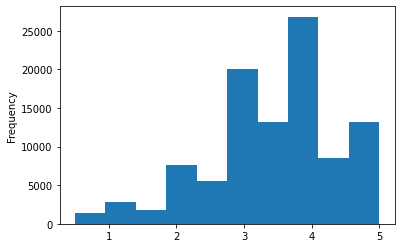

In [23]:
notas.nota.plot(kind='hist')

In [24]:
print('Média',notas['nota'].mean())
print("Mediana",notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [25]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

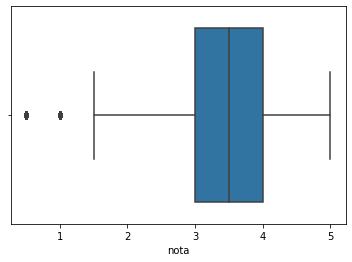

In [26]:
import seaborn as sns 
sns.boxplot(notas.nota)

# **4.4 Análise exploratória de dados e mais gráficos**

In [27]:
#Analisando os filmes
filmes = pd.read_csv('movies.csv')
filmes.head()
filmes.columns = ['filmeId','titulo','genero']
notas.query('filmeId==1')
notas.query('filmeId==1').nota.mean()

3.9209302325581397

# Analisando algumas notas específicas por filme

In [28]:
# Analisando as notas em geral
notas.groupby('filmeId')
notas.groupby('filmeId').mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [29]:
notas.groupby('filmeId').mean()['nota']

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [30]:
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

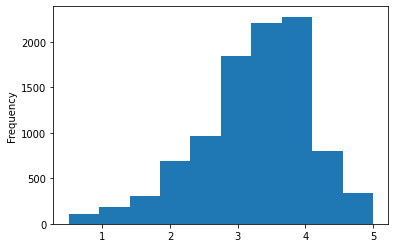

In [31]:
medias_por_filme.plot(kind='hist')

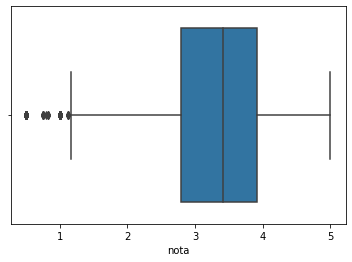

In [32]:
sns.boxplot(medias_por_filme)

In [33]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

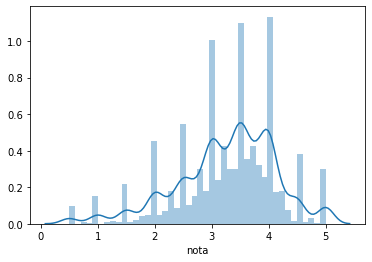

In [34]:
#gráfico de distribuição
sns.distplot(medias_por_filme)

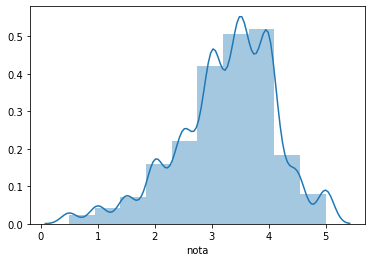

In [35]:
sns.distplot(medias_por_filme,bins=10)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

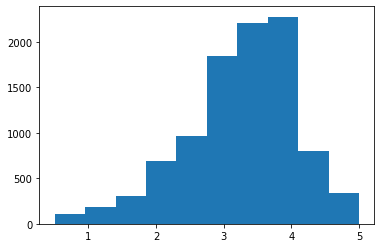

In [36]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

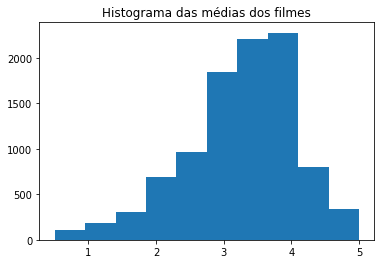

In [37]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

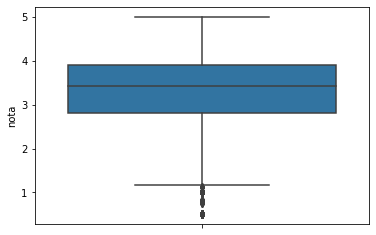

In [38]:
sns.boxplot(y=medias_por_filme)

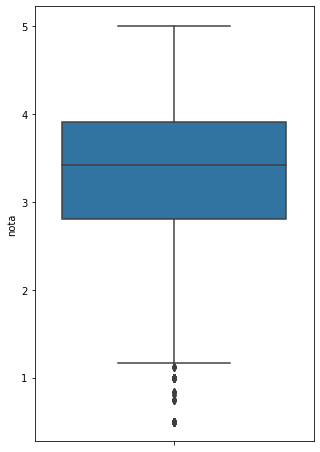

In [39]:
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

# **4.4 - Histograma e boxplot**

O histograma também é conhecido como "distribuição de frequências", e é representado em um gráfico de colunas ou de barras a partir de um conjunto de dados previamente tabulado e dividido em classes (uniformes ou não uniformes).

Já o boxplot, também conhecido como "distribuição de frequências", é um método alternativo para o histograma. Uma de suas particularidades é mostrar a faixa em que está concentrada a média de valores.


# **4.5 - Tipos de variáveis**

In [40]:
import pandas as pd 
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [41]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# **4.6 - Para saber mais**

As variáveis categórias são aquelas que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.

Quando estamos trabalhando com categórias ordinais, existe uma ordenação entre as categorias. Por exemplo: escolaridade (primeiro, segundo e terceiro graus), estágios de uma doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro, ..., dezembro), etc.
[Referências](http://leg.ufpr.br/~silvia/CE055/node8.html)

# **4.7 - Visualizando gráficos por categoria**

Agora que já aprendemos os diversos tipos de váriáveis que aparecem no nosso conjunto de dados, como podemos analisar e extrair informações de uma variável categórica, como as línguas originais dos filmes no TMDB ?

A maneira mais básica de compararmos categorias é descobrindo quantas vezes cada uma delas aparece. Podemos fazer isso como tmdb.original_language.value_counts().

In [42]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ar       2
cs       2
ta       2
id       2
ro       2
is       1
ky       1
el       1
vi       1
sl       1
xx       1
af       1
no       1
ps       1
nb       1
pl       1
hu       1
te       1
tr       1
Name: original_language, dtype: int64

Note que value_counts() pode contar quantas vezes qualquer tipo de valor aparece, inclusive textos(strings).

Quando extraímos somente uma coluna do conjunto, temos o que é chamado de *série*, uma sequência de dados. Mas espera... uma coluna? Parecem ser duas, não é mesmo?

Na verdade, as línguas (en, fr, es e assim por diante) estão funcionando como índices (index), e o array de dados propriamente dito é a coluna dos valores.

Quando queremos criar um dataframe a partir de um índice, usamos a função toframe():

In [43]:
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ko,11


Já quando queremos que esses valores acompanhem duas colunas de dados separadas do ííndice, utilizamos reset_index()

In [44]:
tmdb.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


Renomear as colunas para tornáá-las mais inteligíveis. Em seguida, exibiremos os 5 primeiros resultados para testarmos nossas alterações

In [45]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language","total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


Plotando um gráfico com **Seaborn**

Se passarmos simplesmente contagem_de_lingua para o argumento data dessa função, geraremos um gráfico praticamente inútil, já que ele não demonstrará nenhuma informação inteligível. Para corrigirmos isso, atribuiremos a coluna original_language para o eixo x; e total para o eixo y:

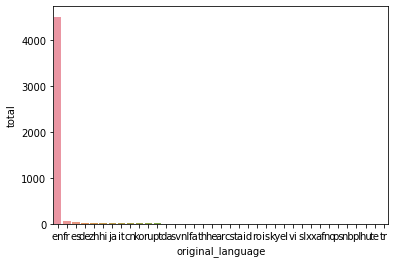

In [46]:
import seaborn as sns
sns.barplot(x='original_language',y='total',data = contagem_de_lingua)

Está funcionando, mas está um pouco trabalhoso, não? Afinal, tivemos que isolar a coluna, contar os valores, transformar essa contagem em um dataframe, reiniciar o índice, corrigir as colunas e finalmente plotar os dados em um gráfico.

No Seaborn, existe uma maneira mais simples de realizarmos essa operação! Além das plotagens de "baixo nível", como o barplot(), que nos fornecem mais controle sobre cada etapa do processo, existem as de mais alto nível, como o catplot(), que realiza uma plotagem baseada em categorias.

Para essa função, passaremos original_language como parâmetro do eixo x, usando como dados (data) a fonte dos nossos dados (tmdb). Já no eixo y, precisamos contar quantas vezes cada língua/categoria aparece. Isso pode ser feito com o argumento kind, que define o tipo de plotagem que queremos utilizar.

Um desses tipos é o count. Dessa forma, iremos plotar categoricamente os nossos elementos, contando quantas vezes eles aparecem no conjunto. Assim, teremos:

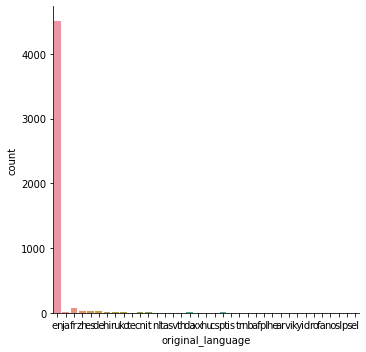

In [47]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

#4.8 - Passando uma mensagem através de visualização

Já fizemos gráficos de barras com o Seaborn e sabemos utilizar o Pyplot para configurar as especificidades do nosso gráfico. Porém, o gráfico que criamos anteriormente não está mostrando as informações de maneira satisfatória.

Afinal, apenas pela visualização, somente conseguimos obter a informação de que o conjunto de dados utilizado possui muitos filmes na língua inglesa

Será que não existe outro tipo de gráfico que consiga nos exibir as diferenças entre as categorias?

Uma das grandes áreas de estudo na ciência de dados é justamente a visualização ("data visualization"), que busca determinar que tipo de gráfico funciona melhor de acordo com a circunstância.

No nosso caso, podemos optar por um gráfico de pizza — em inglês, "pie chart", ou "gráfico de torta". Consultando a documentação, perceberemos que o Seaborn não possui esse tipo de gráfico, mas o Matplotlib sim.

Portanto, usaremos plt.pie() passando como parâmetros a coluna total de contagem_de_lingua e os nomes de cada categoria (labels), encontrados na coluna original_language.

([<matplotlib.patches.Wedge at 0x7fbf6cba6ef0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

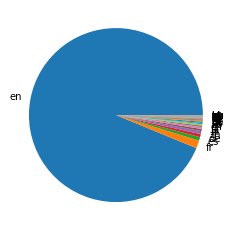

In [48]:
import matplotlib.pyplot as plt
plt.pie(contagem_de_lingua['total'],labels = contagem_de_lingua["original_language"])

O resultado não ficou muito bom, não é? Não conseguimos nem mesmo analisar quantas categorias existem em nosso conjunto, o que era completamente possível no gráfico de barras.

Na realidade, o gráfico de pizza não costuma ser recomendado, afinal, a olho nu, é muito difícil entender as diferenças proporcionais entre as áreas de cada fatia.

Portanto, nenhum dos gráficos que utilizamos até agora nos serviu perfeitamente. Mesmo o de barras, que era mais interessante, continha informações demais, impedindo uma análise compreensiva da mensagem a ser passada.

Nesse conjunto de dados, o inglês (en) possui destaque em relação às outras línguas. Uma maneira simples de expressar essa informação é estabelecendo uma comparação entre o inglês e todas as outras línguas, ao invés de analisá-las individualmente.

Começaremos esse processo atribuindo a contagem total dos valores em original_language a uma variável total_por_lingua. Sobre essa variável, executaremos o atributo loc (de "locate"), passando en como parâmetro.

In [49]:
total_por_lingua = tmdb['original_language'].value_counts()
total_por_lingua.loc['en']

4505

O retorno será, obviamente 4505, que é a quantidade de elementos en no conjunto. Atribuiremos esse retorno a outra variável, total_de_ingles.

Também criaremos uma variável total_geral, que consiste na soma (sum()) de todos os valores em total_por_lingua. Já o total_do_resto será a subtração entre total_geral e total_de_ingles.

Terminaremos imprimindo total_de_ingles e total_do_resto:

In [50]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles,total_do_resto)

4505 298


Assim, temos duas categorias diferentes: "inglês" e "outros". A ideia agora é criarmos um dataframe com esses valores, de modo que possamos plotá-los em um gráfico.

Começaremos criando dados, um dicionário do Python com duas colunas: lingua, que conterá os valores ingles e outros; e total, com os valores total_de_ingles e total_do_resto.

Em seguida, utilizaremos a função DataFrame() do Pandas, passando dados como parâmetro, para efetivamente criarmos nosso dataframe:

In [51]:
dados = {
    'lingua': ['ingles','outros'],
    'total': [total_de_ingles,total_do_resto]
}
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


In [52]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


Plotar esses dados em um gráfico de barras é um processo bem simples, que já aprendemos anteriormente: basta passarmos os dados e definirmos os eixos x e y.

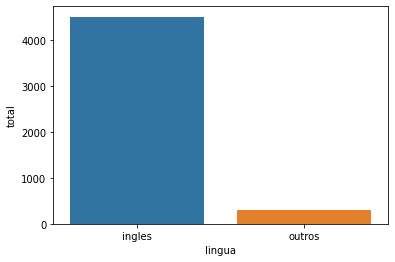

In [53]:
sns.barplot(data = dados,x = 'lingua',y = 'total')

Finalmente conseguimos expressar a informação que gostaríamos, comparando, no nosso conjunto de dados, a incidência da língua inglesa (en) em relação às demais.

Mas também é possível expressar diversas outras informações sobre esse conjunto, como a distribuição de línguas na categoria "outros". Estudaremos essa parte a seguir

## 4.9 Visualizando as outras categorias 

Aprendemos que a escolha do tipo de gráfico influencia muito na análise das nossas informações. Por exemplo, se tentarmos plotar a comparação entre 'inglês' e 'outros' no nosso conjunto em um gráfico de pizza, será que teríamos um bom resultado ?

Para isso, como parâmetros da nossa função plt.pie(), passaremos dados['total'] e labels = dados['lingua']

([<matplotlib.patches.Wedge at 0x7fbf6fba5550>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

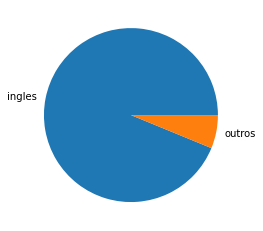

In [54]:
plt.pie(dados['total'],labels=dados['lingua'])

Repare que, no gráfico de barras, é até possível assumirmos que a coluna "inglês" é cerca de dez vezes maior que a coluna "outros" — uma diferença de grandeza pouco perceptível no gráfico de pizza.

Com a legenda ao lado do gráfico, essas medidas ficam ainda mais claras. Certamente poderíamos refinar ainda mais esses gráficos, mostrando informações como os valores específicos.

Nosso objetivo agora é analisar mais profundamente o conjunto "outros". Na prática, queremos remover do dataset todos os elementos que não compartilham a língua inglesa. Para isso, usaremos a função query(), comparando original_language e en:

In [55]:
tmdb.query("original_language=='en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New Yo

Como resultado, teremos todas as linhas do dataset nas quais a língua original é inglês. Porém, queremos trabalhar com as línguas diferentes de inglês, o que é feito com !=:

In [56]:
filmes_sem_lingua_original_em_ingles =tmdb.query("original_language != 'en'")
filmes_sem_lingua_original_em_ingles

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

Nosso retorno, dessa vez, serão todas as linhas em que a língua original não é inglês. Dentro desse conjunto, podemos fazer a contagem dos valores:

In [57]:
total_por_lingua_de_outros_filmes =tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
cs     2
ar     2
id     2
ro     2
ta     2
sl     1
nb     1
xx     1
el     1
vi     1
no     1
tr     1
pl     1
is     1
ps     1
te     1
hu     1
af     1
ky     1
Name: original_language, dtype: int64

Atribuiremos esse retorno a uma variável total_por_lingua_de_outros_filmes. Em seguida, atribuiremos nossa query original a outra variável, filmes_sem_lingua_original_em_ingles. Com o catplot(kind="count"), podemos plotar de uma só vez as categorias contidas nesse conjunto, agrupando as línguas e contando-as.

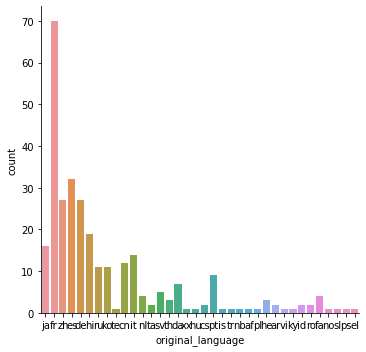

In [58]:
sns.catplot(x = 'original_language',data = filmes_sem_lingua_original_em_ingles,kind='count')

Apesar de funcional, não está muito bonito, não é? Quando estamos trabalhando com data visualization, é comum nos preocuparmos com alguns refinamentos, e nesse caso realmente iremos atuar de modo a tornar as informações mais compreensíveis, configurando as cores e o formato, por exemplo.

# 4.12 - Refinando visualizações

Ainda podemos refiná-lo de modo a tornar as informações mais inteligíveis e interessantes para nossos objetivos. O primeiro ponto a ser analisado é o formato, já que o gráfico tem um aspecto quadrado (mesma altura e largura).

Às vezes esse é exatamente o aspecto de que necessitamos para nosso conjunto de dados, mas nesse caso temos muitas categorias, e seria ideal termos um espaço maior no eixo x.

Anteriormente, quando estávamos gerando gráficos boxplot com o Matplotlib, utilizamos o figure(figsize=) para ajustarmos as dimensões da figura.

Podemos, então, tentar definir a figura do nosso gráfico com o seguinte código, ajustando as proporções entre altura e largura:


In [59]:
plt.figure(figsize=5 , 10)

sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

SyntaxError: ignored

Seaborn tem dois tipos de funções. O primeiro corresponde às funções que trabalham nos eixos e que são de mais baixo nível, como a barplot(). Nesse caso, é possível configurar manualmente a figura que será gerada, para, em seguida, plotar o gráfico nesta figura.

Porém, existem funções que não funcionam nos eixos de uma imagem configurada previamente, mas sim em uma caracterizada automaticamente pelo próprio Seaborn. E adivinhe: a catplot() faz parte deste segundo tipo, já que é uma função de mais alto nível e que, inclusive, chama outra função (a countplot()) no processo.

Portanto, na tentativa de gerar o gráfico de barras, a linha plt.figure(figsize=5,10) é completamente ignorada.

Para solucionarmos esse problema, buscaremos um modo de controlar o aspecto da imagem na documentação do catplot() (Links para um site externo.).

Encontraremos que, por padrão, o catplot() tem os parâmetros height=1 (que corresponde à altura) e aspect=1. Dobrando este último valor (aspect=2), conseguiremos gerar o retângulo que desejamos:

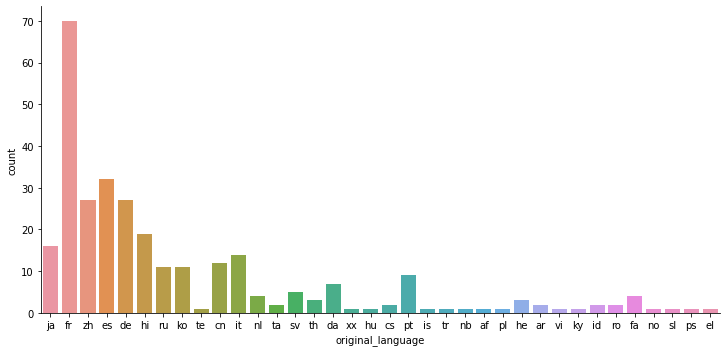

In [60]:
sns.catplot(x='original_language',data=filmes_sem_lingua_original_em_ingles,kind='count',aspect=2)

Apesar de conseguirmos ler corretamente as categorias, não temos uma ordem de grandeza, o que torna a leitura do gráfico mais complicada.

Portanto, nosso atual objetivo é ordenar esses valores a partir daquele que mais aparece no conjunto. Para isso, passaremos para a função catplot() o argumento order, recebendo como atributo total_por_lingua_de_outros_filmes.index — já que, como é possível verificar nas aulas anteriores, o índice dessa série já está ordenado do maior valor para o menor.

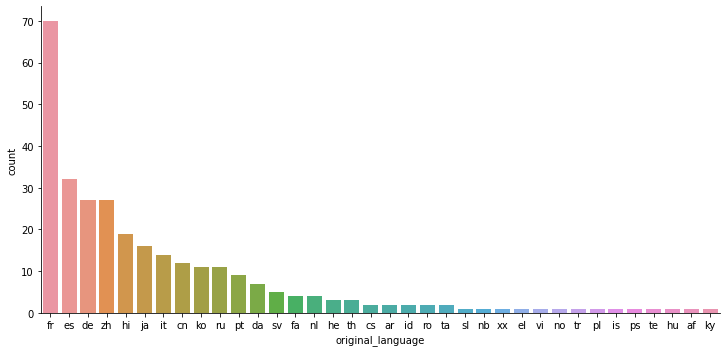

In [61]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, 
            kind="count", 
            aspect=2,
            order = total_por_lingua_de_outros_filmes.index)

Também podemos ajustar a paleta de cores no nosso gráfico. Existem várias maneiras de trabalhar com as cores, dependendo, por exemplo, do tipo de variáveis que estivermos utilizando.

No nosso caso, desejamos variar os tons de uma única cor — de um azul mais escuro para um tom mais claro, por exemplo. Na documentação do Seaborn (Links para um site externo.), encontramos que a paleta do azul pode ser definida com a string GnBu_d.

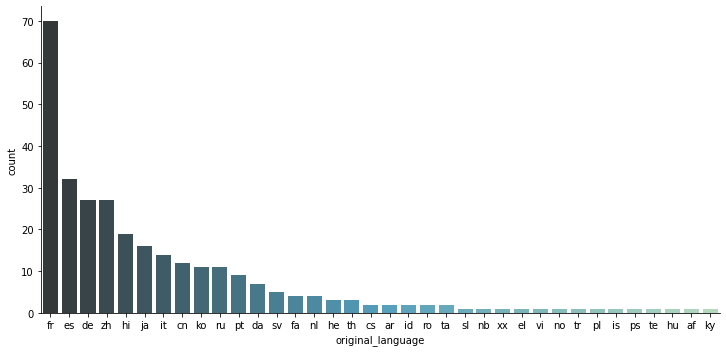

In [62]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, 
            kind="count", 
            aspect=2,
            palette="GnBu_d",
            order = total_por_lingua_de_outros_filmes.index)

Perceba que agora nosso gráfico está muito mais limpo e interessante, e as informações nele podem ser lidas com mais facilidade.

Existem vários outros parâmetros e configurações que podem ser aplicados às visualizações geradas por essas bibliotecas, cujas especificações podem ser encontradas em suas respectivas documentações.

Nosso objetivo, até o momento, foi explorar algumas dessas possibilidades, tentando entender quando e como utilizar algumas dessas customizações, afinal, muito do que queremos ou precisamos fazer já está implementado nessas bibliotecas, basta buscarmos essas informações.

Com as visualizações que criamos, conseguimos extrair duas informações bastante valiosas sobre nosso dataset: a de que o inglês é, de longe, a língua mais predominante no conjunto; e a ordem de frequência na qual as demais línguas aparecem dentro dele.

Ainda é possível juntarmos essas duas informações em um único gráfico, mas aprenderemos isso a seguir!

# 4.13 - Para saber mais

Com o Seaborn, somos capazes de criar vários tipos de gráficos ou visualizações. Ao longo deste curso, aprendemos a fazer os gráficos de barras (histogramas) e diagrama de caixa (boxplot).


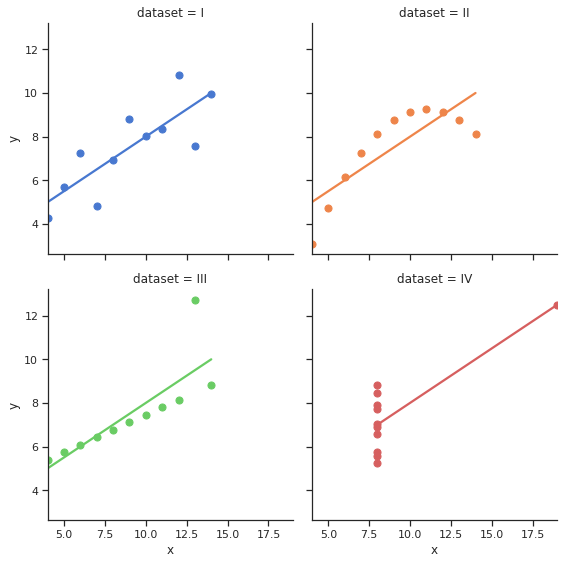

In [63]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# 4.14 - Medidas

Nessa etapa, vamos analisar dois filmes específicos do nosso arquivo movies.csv. Com filmes.head(2), mostraremos os dois primeiros elementos desse dataset:

Em seguida, buscaremos com notas.query() as notas desses dois filmes, passando o id de cada um e atribuindo o retorno a duas diferentes variáveis


In [64]:
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story),len(notas_do_jumanji))

215 110


Média dos dois filmes

In [65]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


Existe alguma diferença entre essas médias, mas esse dado não consegue expressar, por exemplo, quantas pessoas amaram ou odiaram esses filmes, ou, em outros termos, quantas notas 5 ou 0,5 cada um desses filmes teve.

Se buscamos a mediana desses elementos...

In [0]:
print("Mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

...os resultados são basicamente os mesmos, afinal não sabemos, nessa divisão, a proporção de cada uma das notas para os dois filmes. Por mais que tentemos analisar o "comportamento central" desses conjuntos, estamos tentando resumir toda a distribuição dos dados em um único número, perdendo um volume muito grande de informação.

Para ilustrarmos melhor essa ideia, criaremos uma situação hipotética. Imaginemos que um grupo de 10 pessoas deu a nota 2.5 para um determinado filme. Expressaremos isso no nosso código criando um array de 10 elementos com a ajuda do Numpy, uma biblioteca que já vem instalada no Colab e que muitas vezes é utilizada nas operações do Pandas.

Primeiro, importaremos o Numpy e chamaremos a função array() para criarmos nosso conjunto

In [67]:
import numpy as np
np.array([2.5]*10)
np.array([2.5]*10).mean()

2.5

Criaremos, então, outro array de 10 elementos, dessa vez com a nota 3,5. Com a função append(), juntaremos esses dois arrays em um único, que atribuiremos a uma variável filme1:

In [0]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [70]:
print(filme1.mean(), filme2.mean())

3.0 3.0


Mediana

In [71]:
print(np.median(filme1), np.median(filme2))

3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

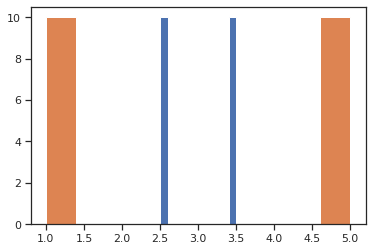

In [72]:
plt.hist(filme1)
plt.hist(filme2)